# INF 552 : Machine learning for data science
# HOMEWORK 2





> Submitted by Vignesh Prabhakar

> USC ID : 4024890667





# 1. (a) Mounted the data from the folder in my google drive 

In [154]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Imported the entire excel file and thereafter extracted excel sheets from the excel file and stored them in separate dataframe variables.The contents of all the extracted excel sheets are entirely same but in a different order as they had been generated by cross validation. So I considered just one of those excel sheets for this assignment . 

In [0]:
import pandas as pd
df_ccpp = pd.ExcelFile('/gdrive/My Drive/Homeworks/CCPP/Folds5x2_pp.xlsx')
df_ccpp_s1 = pd.read_excel(df_ccpp, 'Sheet1')
df_ccpp_s2 = pd.read_excel(df_ccpp, 'Sheet2')
df_ccpp_s3 = pd.read_excel(df_ccpp, 'Sheet3')
df_ccpp_s4 = pd.read_excel(df_ccpp, 'Sheet4')
df_ccpp_s5 = pd.read_excel(df_ccpp, 'Sheet5')

# 1. (b) 1. No of rows and columns in the data and what they represent
The dataset has 9568 rows and 5 columns.

In [156]:
print(df_ccpp_s1.shape)


(9568, 5)


A view of the loaded dataset . It has 5 columns out of which AT , V , AP and RH are the four predictor variables whereas PE is the one and only response variable .

The predictor columns represent the following :

1. AT - Ambient Temperature
2. V  - Exhaust vaccuum
3. AP - Ambient Pressure
4. RH - Relative humidity

The response column represents the following :

1. PE - energy output 


The rows in the dataset are the data points collected from a Combined Cycle Power Plant over a duration of 6 years (2006-2011), when the power plant was set to work with full load .

In [157]:
df_ccpp_s1.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# 1. (b) 2. Pairplots of all the variables 

Pairplots for 4 independent variables and 1 dependent variable have been plotted below . The scatterplots for one independent variable vs another independent variable depicts the kind of correlation between them which maybe positive , negative or no correlation at all .  The scatterplots for a dependent variable vs an independent variable depict the change in the response for a unit change in the predictor . I have utilised seaborn library to plot the pairplots. 

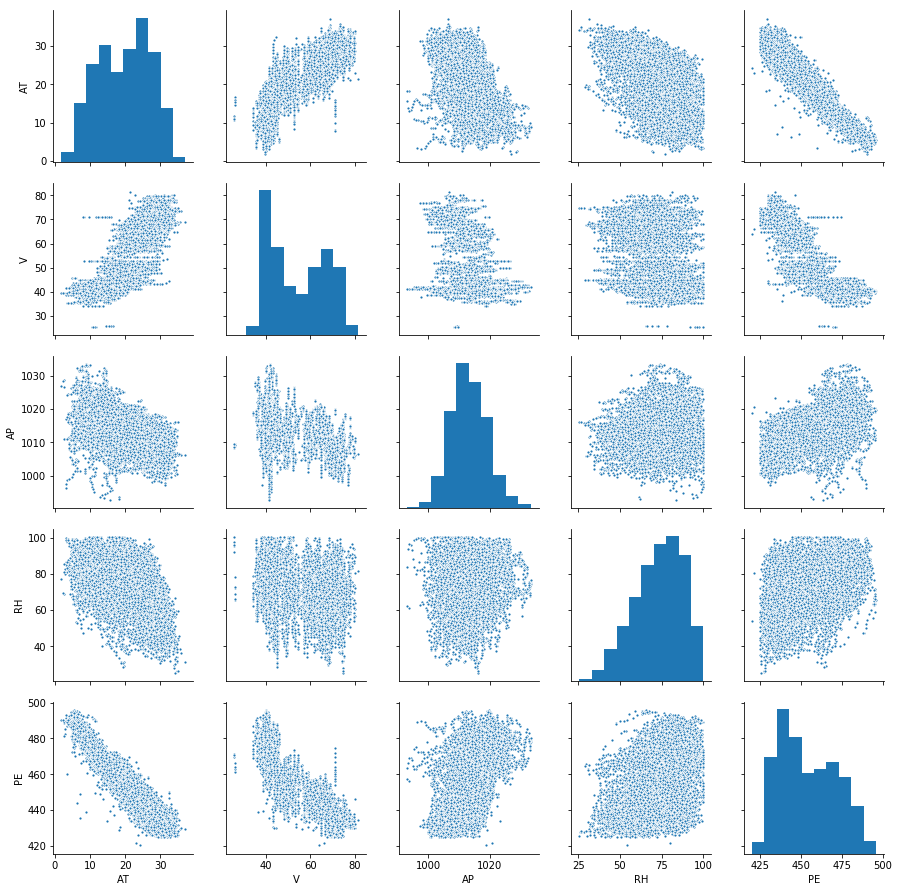

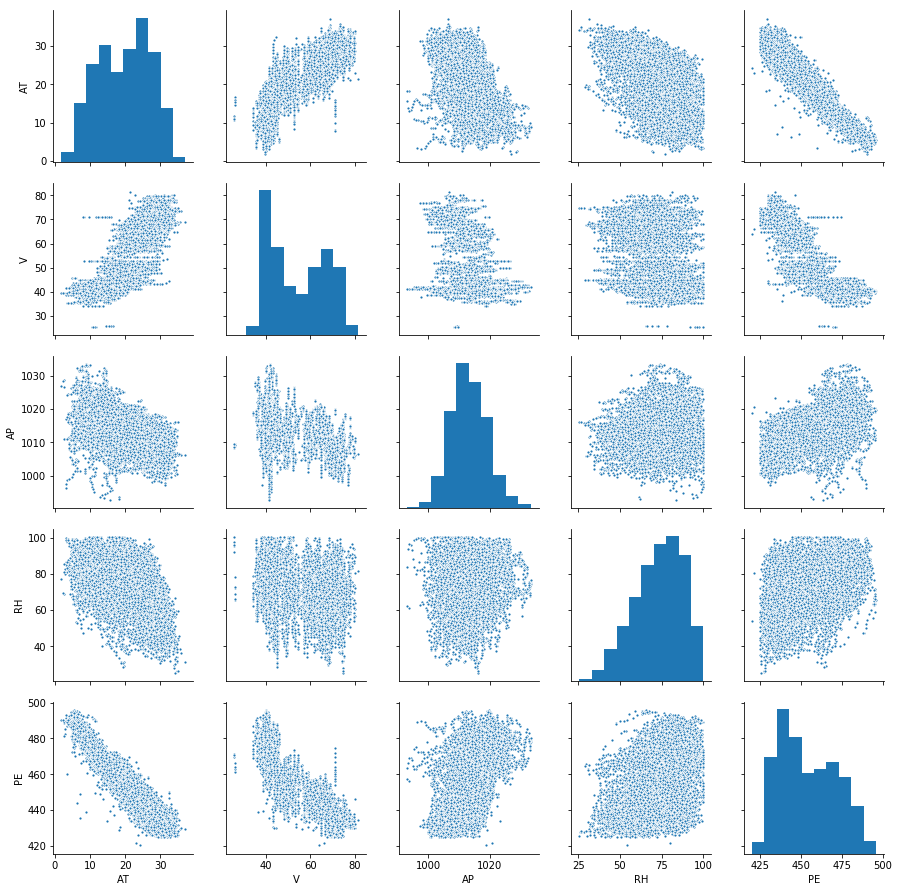

In [158]:
import seaborn as sns
g = sns.pairplot(df_ccpp_s1,markers=".")

Extracting each of the features and the response variable and storing them in separate variables .

In [0]:

independent_x1 = df_ccpp_s1['AT']
independent_x2 = df_ccpp_s1['V']   
independent_x3 = df_ccpp_s1['AP']
independent_x4 = df_ccpp_s1['RH']

dependent_y1 = df_ccpp_s1['PE']


# 1. (b) 3. Summarization of mean ,median , 1st and 3rd quartile and IQR in a table 

Calculated mean , median , range,first quartile ,third quartile and inter quartile range for all the variables in the dataset using the statistics library and thereafter summarised those metrics in a tabular form as stated in the question

In [0]:
import statistics
import numpy as np

mean_at=statistics.mean(independent_x1)
mean_v=statistics.mean(independent_x2)
mean_ap=statistics.mean(independent_x3)
mean_rh=statistics.mean(independent_x4)
mean_pe=statistics.mean(dependent_y1)

mean_fn=[mean_at,mean_v,mean_ap,mean_rh,mean_pe]


med_at=statistics.median(independent_x1)
med_v=statistics.median(independent_x2)
med_ap=statistics.median(independent_x3)
med_rh=statistics.median(independent_x4)
med_pe=statistics.median(dependent_y1)

med_fn=[med_at,med_v,med_ap,med_rh,med_pe]


fq_at=np.percentile(independent_x1, 25) 
fq_v=np.percentile(independent_x2, 25)
fq_ap=np.percentile(independent_x3, 25)
fq_rh=np.percentile(independent_x4, 25)
fq_pe=np.percentile(dependent_y1, 25)

fq_fn=[fq_at,fq_v,fq_ap,fq_rh,fq_pe]


tq_at=np.percentile(independent_x1, 75) 
tq_v=np.percentile(independent_x2, 75)
tq_ap=np.percentile(independent_x3, 75)
tq_rh=np.percentile(independent_x4, 75)
tq_pe=np.percentile(dependent_y1, 75)

tq_fn=[tq_at,tq_v,tq_ap,tq_rh,tq_pe]


iqr_at=tq_at - fq_at
iqr_v=tq_v - fq_v
iqr_ap=tq_ap - fq_ap
iqr_rh=tq_rh - fq_rh
iqr_pe=tq_pe - fq_pe

iqr_fn=[iqr_at,iqr_v,iqr_ap,iqr_rh,iqr_pe]



stats_table = pd.DataFrame(
    {'mean':mean_fn ,
     'median':med_fn,
     'first quartile': fq_fn,
     'third quartile': tq_fn,
     'IQR': iqr_fn
     
    })

stats_table.rename(index={0:'ambient temp',1:'exhaust vacuum',2:'ambient pressure',3:'relative humidity',4:'energy output'}, inplace=True)

The tabulation has been shown below

In [161]:
stats_table

,mean,median,first quartile,third quartile,IQR
ambient temp,19.651231,20.345,13.5100,25.72,12.2100
exhaust vacuum,54.305804,52.080,41.7400,66.54,24.8000
ambient pressure,1013.259078,1012.940,1009.1000,1017.26,8.1600
relative humidity,73.308978,74.975,63.3275,84.83,21.5025
energy output,454.365009,451.550,439.7500,468.43,28.6800


,mean,median,first quartile,third quartile,IQR
ambient temp,19.651231,20.345,13.5100,25.72,12.2100
exhaust vacuum,54.305804,52.080,41.7400,66.54,24.8000
ambient pressure,1013.259078,1012.940,1009.1000,1017.26,8.1600
relative humidity,73.308978,74.975,63.3275,84.83,21.5025
energy output,454.365009,451.550,439.7500,468.43,28.6800


# 1. (c) Simple linear regression model for each predictor against the response and the associated plots demonstrating statistical significance & visualizing outliers 

Performed the train-test split and fit a linear regression model for Ambient temperature and energy output . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data .



In [162]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
mdl = LinearRegression()

independent_x1_train, independent_x1_test, dependent_y1_train, dependent_y1_test = train_test_split(independent_x1, dependent_y1, test_size=0.2, random_state=0)

independent_x1_train=independent_x1_train.values.reshape(-1,1)
independent_x1_test=independent_x1_test.values.reshape(-1,1)
dependent_y1_train=dependent_y1_train.values.reshape(-1,1)
dependent_y1_test=dependent_y1_test.values.reshape(-1,1)


mdl.fit(independent_x1_train,dependent_y1_train)

predicted_val_feature1 = mdl.predict(independent_x1_test)

df_predvsact1 = pd.DataFrame({'Actual value': dependent_y1_test.flatten(), 'Predicted value': predicted_val_feature1.flatten()})

df_predvsact1.head()

,Actual value,Predicted value
0,431.23,434.764108
1,460.01,459.053804
2,461.14,464.746023
3,445.90,448.234244
4,451.29,457.098462


,Actual value,Predicted value
0,431.23,434.764108
1,460.01,459.053804
2,461.14,464.746023
3,445.90,448.234244
4,451.29,457.098462


Utilised scipy in order to test the significance of our coefficient estimate in the linear regression model between ambient temperature and energy output .



slope is -2.1726024841820397

beta 0 is 497.030895665508

R-sq val is 0.8974271121640927

P value is 0.0000

Std error is 0.008396716486701422

Null hypothesis 

Ho : beta1 i.e. slope = 0

Alternate hypothesis 

H1 : beta1 i.e. slope != 0

As P value < level of significance ( 0.05) ; ambient temperature is a significant feature ( beta1 i.e slope ! -0 )

So we reject the Null hypothesis and say AT is significant .


Plots for demonstrating statistical significance : scatterplot between PE and AT

Outlier detection :

No outliers /leverage points identified in the boxplot of ambient temperature ( Generally , dots are used to represent the outliers in a boxplot ).

Ultimately our outliers are data points that demonstrate high deviation and are hence difficult to be modelled by our regression function . In terms of boxplots for a given independent variable, the outliers are generally defined as those values that lie outside  (mean - 3 * std deviation  ,mean+3 * std deviation) . Ultimately when we are estimating our regression function we want to be able to accommodate as much points within the expected range of values as possible for a given independent variable .The ones we cannot accommodate are the data instances in our independent variable which have a very high residual error . So our regression function would be able to model the data points that dont show huge deviations from the mean value of the considered feature . The ones that do show huge deviations would be naturally difficult to model and the very same points are represented as dots in the boxplots and have a high residual error when modelled against a dependent variable . They are also termed as high and low leverage points



A more quantitative approach to label data points as outliers would be to calculate the cook's distance for each data point and then selecting the maximal values from them or by  computation of Z score.   








slope is -2.1726024841820397
beta 0 is 497.030895665508
R-sq val is 0.8974271121640927
P value is 0.0000
Std error is 0.008396716486701422


<Figure size 432x288 with 0 Axes>

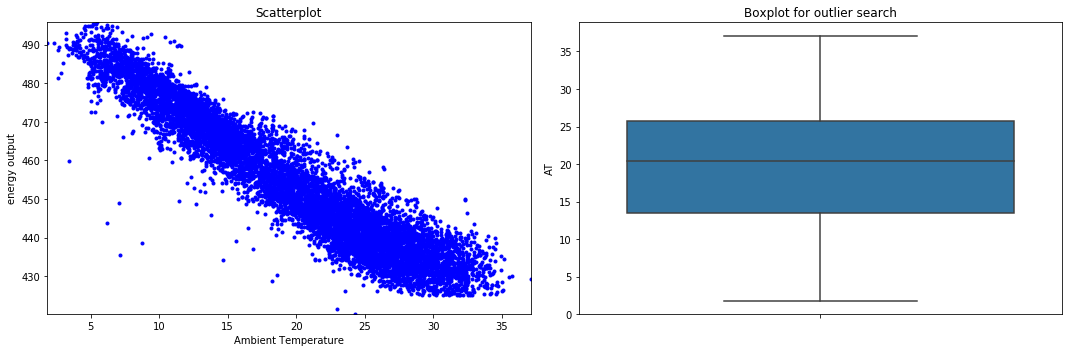

slope is -2.1726024841820397
beta 0 is 497.030895665508
R-sq val is 0.8974271121640927
P value is 0.0000
Std error is 0.008396716486701422


<Figure size 432x288 with 0 Axes>

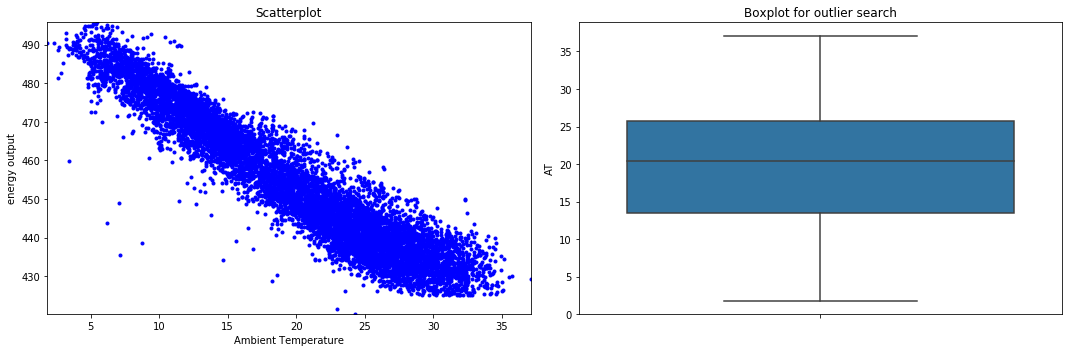

In [163]:
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(independent_x1_train[:,0],dependent_y1_train[:,0])
print("slope is",slope)
print("beta 0 is",intercept)
print("R-sq val is",r_value**2)
print("P value is",str.format('{0:.4f}', p_value))

print("Std error is",std_err)

slp_independent_x1 = slope
inter_independent_x1 = intercept
r2_independent_x1 = r_value**2
p_independent_x1 = p_value
stderr_independet_x1 = std_err

k = plt.figure()    
k,sbplts  = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False)


sbplts[0].scatter(independent_x1,dependent_y1, marker = ".",c="blue")
sbplts[0].set_ylabel('energy output')
sbplts[0].set_xlabel('Ambient Temperature')
sbplts[0].set_title('Scatterplot')
sbplts[0].set_xlim([min(independent_x1), max(independent_x1)])
sbplts[0].set_ylim([min(dependent_y1),max(dependent_y1)])

sn.boxplot(y=df_ccpp_s1['AT'],ax=sbplts[1])
sbplts[1].set_title('Boxplot for outlier search')

k.set_figheight(5)
k.set_figwidth(15)

k.tight_layout()
plt.show()

Fit a linear regression model for Exhaust vaccuum and energy output . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data .


In [164]:
independent_x2_train, independent_x2_test, dependent_y1_train, dependent_y1_test = train_test_split(independent_x2, dependent_y1, test_size=0.2, random_state=0)

independent_x2_train=independent_x2_train.values.reshape(-1,1)
independent_x2_test=independent_x2_test.values.reshape(-1,1)
dependent_y1_train=dependent_y1_train.values.reshape(-1,1)
dependent_y1_test=dependent_y1_test.values.reshape(-1,1)


mdl.fit(independent_x2_train,dependent_y1_train)

predicted_val_feature2 = mdl.predict(independent_x2_test)

df_predvsact2 = pd.DataFrame({'Actual value': dependent_y1_test.flatten(), 'Predicted value': predicted_val_feature2.flatten()})

df_predvsact2.head()

,Actual value,Predicted value
0,431.23,426.893404
1,460.01,460.167777
2,461.14,467.449458
3,445.90,449.752059
4,451.29,453.305520


,Actual value,Predicted value
0,431.23,426.893404
1,460.01,460.167777
2,461.14,467.449458
3,445.90,449.752059
4,451.29,453.305520


Utilised scipy in order to test the significance of our coefficient estimate in the linear regression model between exhaust vaccuum and energy output .



slope is -1.1650690556881316

beta0 is 517.7105372526146

R-sq val is 0.7566456629034749

P value is 0.0000

Std error is 0.0075533125996115605

Null hypothesis 

Ho : beta1 i.e. slope = 0

Alternate hypothesis 

H1 : beta1 i.e. slope != 0

As P value < level of significance ( 0.05) ; exhaust vaccuum is a significant feature ( beta1 i.e slope ! -0 )

So we reject the Null hypothesis and say V is significant .


Plots for demonstrating statistical significance : scatterplot between PE and V

Outlier detection :

No outliers /leverage points identified in the boxplot of exhaust vaccuum ( Generally , dots are used to represent the outliers in a boxplot ).

Ultimately our outliers are data points that demonstrate high deviation and are hence difficult to be modelled by our regression function . In terms of boxplots for a given independent variable, the outliers are generally defined as those values that lie outside  (mean - 3 * std deviation  ,mean+3 * std deviation) . Ultimately when we are estimating our regression function we want to be able to accommodate as much points within the expected range of values as possible for a given independent variable .The ones we cannot accommodate are the data instances in our independent variable which have a very high residual error . So our regression function would be able to model the data points that dont show huge deviations from the mean value of the considered feature . The ones that do show huge deviations would be naturally difficult to model and the very same points are represented as dots in the boxplots and have a high residual error when modelled against a dependent variable . They are also termed as high and low leverage points


A more quantitative approach to label data points as outliers would be to calculate the cook's distance for each data point and then selecting the maximal values from them or by  computation of Z score.   




slope is -1.1650690556881316
beta0 is 517.7105372526146
R-sq val is 0.7566456629034749
P value is 0.0000
Std error is 0.0075533125996115605


<Figure size 432x288 with 0 Axes>

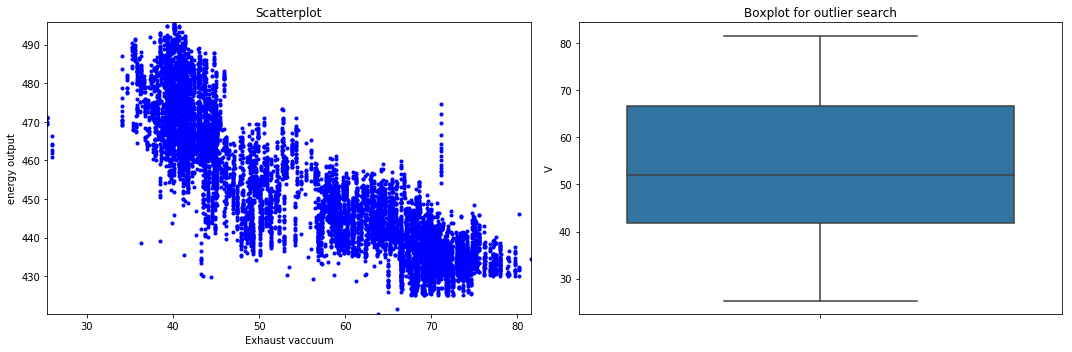

slope is -1.1650690556881316
beta0 is 517.7105372526146
R-sq val is 0.7566456629034749
P value is 0.0000
Std error is 0.0075533125996115605


<Figure size 432x288 with 0 Axes>

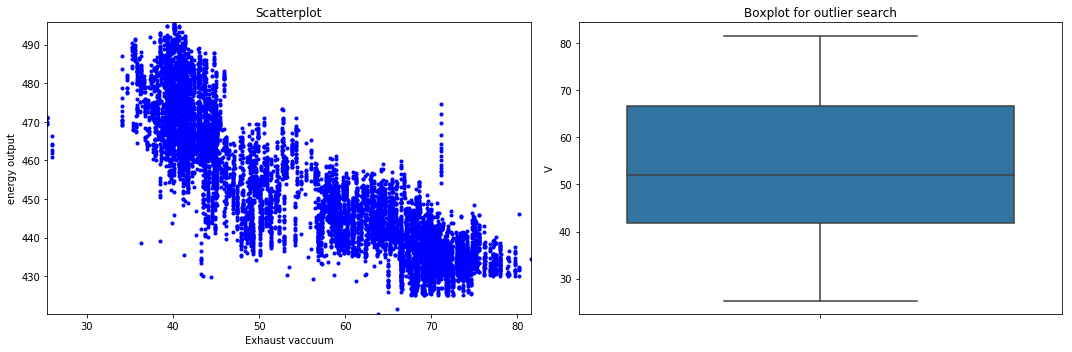

In [165]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_x2_train[:,0],dependent_y1_train[:,0])
print("slope is",slope)
print("beta0 is",intercept)
print("R-sq val is",r_value**2)
print("P value is",str.format('{0:.4f}', p_value))
print("Std error is",std_err)

slp_independent_x2 = slope
inter_independent_x2 = intercept
r2_independent_x2 = r_value**2
p_independent_x2 = p_value
stderr_independet_x2 = std_err




k = plt.figure()    
k,sbplts  = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False)


sbplts[0].scatter(independent_x2,dependent_y1, marker = ".",c="blue")
sbplts[0].set_ylabel('energy output')
sbplts[0].set_xlabel('Exhaust vaccuum')
sbplts[0].set_title('Scatterplot')
sbplts[0].set_xlim([min(independent_x2), max(independent_x2)])
sbplts[0].set_ylim([min(dependent_y1),max(dependent_y1)])

sn.boxplot(y=df_ccpp_s1['V'],ax=sbplts[1])
sbplts[1].set_title('Boxplot for outlier search')

k.set_figheight(5)
k.set_figwidth(15)

k.tight_layout()





plt.show()

Fit a linear regression model for Ambient Pressure and energy output . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data .


In [166]:
independent_x3_train, independent_x3_test, dependent_y1_train, dependent_y1_test = train_test_split(independent_x3, dependent_y1, test_size=0.2, random_state=0)

independent_x3_train=independent_x3_train.values.reshape(-1,1)
independent_x3_test=independent_x3_test.values.reshape(-1,1)
dependent_y1_train=dependent_y1_train.values.reshape(-1,1)
dependent_y1_test=dependent_y1_test.values.reshape(-1,1)


mdl.fit(independent_x3_train,dependent_y1_train)

predicted_val_feature3 = mdl.predict(independent_x3_test)

df_predvsact3 = pd.DataFrame({'Actual value': dependent_y1_test.flatten(), 'Predicted value': predicted_val_feature3.flatten()})

df_predvsact3.head()

,Actual value,Predicted value
0,431.23,448.815604
1,460.01,466.648864
2,461.14,463.216521
3,445.90,454.262583
4,451.29,464.723768


,Actual value,Predicted value
0,431.23,448.815604
1,460.01,466.648864
2,461.14,463.216521
3,445.90,454.262583
4,451.29,464.723768


Utilised scipy in order to test the significance of our coefficient estimate in the linear regression model between Ambient Pressure and energy output .

slope is 1.492323008564115

beta0 is -1057.7740122970315

R-sq val is 0.27033511712216846

P value is 0.0000

Std error is 0.028027595709160052

Null hypothesis

Ho : beta1 i.e. slope = 0

Alternate hypothesis

H1 : beta1 i.e. slope != 0

As P value < level of significance ( 0.05) ; Ambient Pressure is a significant feature ( beta1 i.e slope ! -0 )

So we reject the Null hypothesis and say AP is significant .

Plots for demonstrating statistical significance : scatterplot between PE and AP

Outlier detection :

outliers /leverage points identified in the boxplot of ambient pressure ( Generally , dots are used to represent the outliers in a boxplot ) . The ambient pressure values less than 997 and ambient pressure values greater than 1030 are considered as outliers as they do not lie within the range of (mean + 3 * std-dev , mean - 3 * std-dev) . **Yes , I would prefer to remove these outliers in order to be able to reduce the residual error in our regression model to be able to better fit the data points using the regression curve** 

Ultimately our outliers are data points that demonstrate high deviation and are hence difficult to be modelled by our regression function . In terms of boxplots for a given independent variable, the outliers are generally defined as those values that lie outside  (mean - 3 * std deviation  ,mean+3 * std deviation) . Ultimately when we are estimating our regression function we want to be able to accommodate as much points within the expected range of values as possible for a given independent variable .The ones we cannot accommodate are the data instances in our independent variable which have a very high residual error . So our regression function would be able to model the data points that dont show huge deviations from the mean value of the considered feature . The ones that do show huge deviations would be naturally difficult to model and the very same points are represented as dots in the boxplots and have a high residual error when modelled against a dependent variable . They are also termed as high and low leverage points

A more quantitative approach to label data points as outliers would be to calculate the cook's distance for each data point and then selecting the maximal values from them or by  computation of Z score.   

slope is 1.492323008564115
beta0 is -1057.7740122970315
R-sq val is 0.27033511712216846
P value is 0.0000
Std error is 0.028027595709160052


<Figure size 432x288 with 0 Axes>

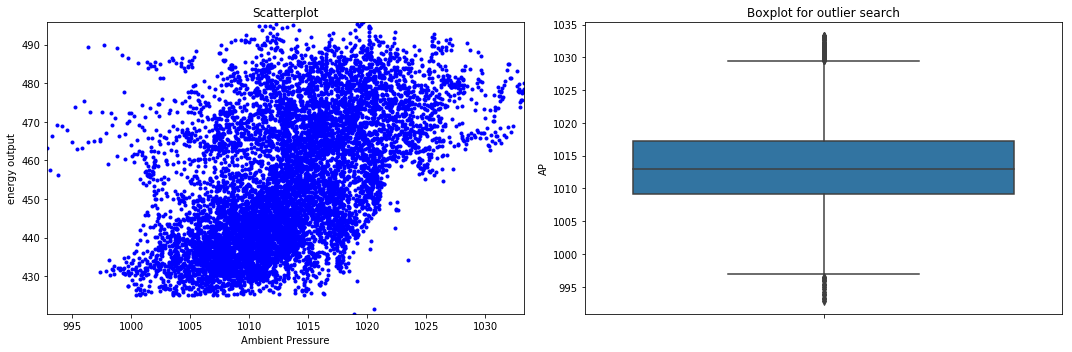

slope is 1.492323008564115
beta0 is -1057.7740122970315
R-sq val is 0.27033511712216846
P value is 0.0000
Std error is 0.028027595709160052


<Figure size 432x288 with 0 Axes>

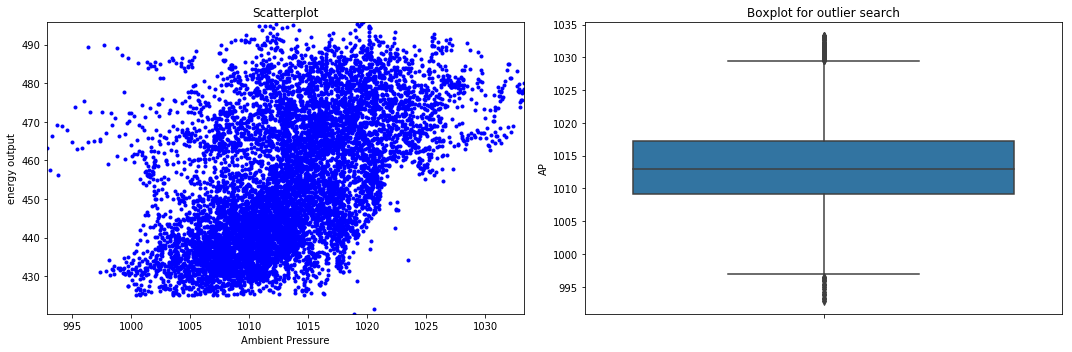

In [167]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_x3_train[:,0],dependent_y1_train[:,0])
print("slope is",slope)
print("beta0 is",intercept)
print("R-sq val is",r_value**2)
print("P value is",str.format('{0:.4f}', p_value))
print("Std error is",std_err)
slp_independent_x3 = slope
inter_independent_x3 = intercept
r2_independent_x3 = r_value**2
p_independent_x3 = p_value
stderr_independet_x3 = std_err


k = plt.figure()    
k,sbplts  = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False)

sbplts[0].scatter(independent_x3,dependent_y1, marker = ".",c="blue")
sbplts[0].set_ylabel('energy output')
sbplts[0].set_xlabel('Ambient Pressure')
sbplts[0].set_title('Scatterplot')
sbplts[0].set_xlim([min(independent_x3), max(independent_x3)])
sbplts[0].set_ylim([min(dependent_y1),max(dependent_y1)])

sn.boxplot(y=df_ccpp_s1['AP'],ax=sbplts[1])
sbplts[1].set_title('Boxplot for outlier search')

k.set_figheight(5)
k.set_figwidth(15)

k.tight_layout()
plt.show()

Fit a linear regression model for Relative humidity and energy output . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data .

In [168]:
independent_x4_train, independent_x4_test, dependent_y1_train, dependent_y1_test = train_test_split(independent_x4, dependent_y1, test_size=0.2, random_state=0)

independent_x4_train=independent_x4_train.values.reshape(-1,1)
independent_x4_test=independent_x4_test.values.reshape(-1,1)
dependent_y1_train=dependent_y1_train.values.reshape(-1,1)
dependent_y1_test=dependent_y1_test.values.reshape(-1,1)


mdl.fit(independent_x4_train,dependent_y1_train)

predicted_val_feature4 = mdl.predict(independent_x4_test)

df_predvsact4 = pd.DataFrame({'Actual value': dependent_y1_test.flatten(), 'Predicted value': predicted_val_feature4.flatten()})

df_predvsact4.head()

,Actual value,Predicted value
0,431.23,452.386746
1,460.01,459.392915
2,461.14,466.013881
3,445.90,452.210006
4,451.29,452.051392


,Actual value,Predicted value
0,431.23,452.386746
1,460.01,459.392915
2,461.14,466.013881
3,445.90,452.210006
4,451.29,452.051392


Utilised scipy in order to test the significance of our coefficient estimate in the linear regression model between Relative humidity and energy output .

slope is 0.45318039872621285

beta0 is 421.08557582677435

R-sq val is 0.15043434246795712

P value is 0.0000

Std error is 0.012311433245958167

Null hypothesis

Ho : beta1 i.e. slope = 0

Alternate hypothesis

H1 : beta1 i.e. slope != 0

As P value < level of significance ( 0.05) ; Relative humidity is a significant feature ( beta1 i.e slope ! -0 )

So we reject the Null hypothesis and say RH is significant .

Plots for demonstrating statistical significance : scatterplot

Outlier detection :

Outliers /leverage points identified in the boxplot of relative humidity ( Generally , dots are used to represent the outliers in a boxplot ).The relative humidity values less than 30 are considered as outliers as they do not lie within the range of (mean + 3 * std-dev , mean - 3 * std-dev) .**Yes , I would prefer to remove these outliers in order to be able to reduce the residual error in the regression model and to be able to better fit the data points using the regression curve** 

Ultimately our outliers are data points that demonstrate high deviation and are hence difficult to be modelled by our regression function . In terms of boxplots for a given independent variable, the outliers are generally defined as those values that lie outside  (mean - 3 * std deviation  ,mean+3 * std deviation) . Ultimately when we are estimating our regression function we want to be able to accommodate as much points within the expected range of values as possible for a given independent variable .The ones we cannot accommodate are the data instances in our independent variable which have a very high residual error . So our regression function would be able to model the data points that dont show huge deviations from the mean value of the considered feature . The ones that do show huge deviations would be naturally difficult to model and the very same points are represented as dots in the boxplots and have a high residual error when modelled against a dependent variable . They are also termed as high and low leverage points .

A more quantitative approach to label data points as outliers would be to calculate the cook's distance for each data point and then selecting the maximal values from them or by  computation of Z score.   

slope is 0.45318039872621285
beta0 is 421.08557582677435
R-sq val is 0.15043434246795712
P value is 0.0000
Std error is 0.012311433245958167


<Figure size 432x288 with 0 Axes>

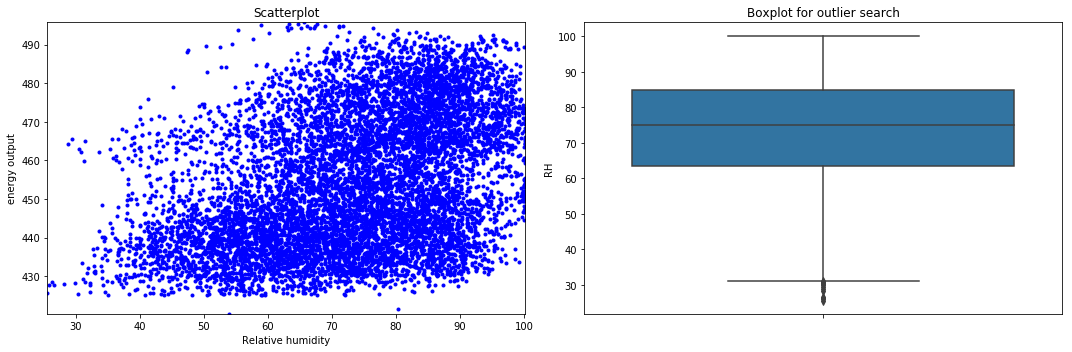

slope is 0.45318039872621285
beta0 is 421.08557582677435
R-sq val is 0.15043434246795712
P value is 0.0000
Std error is 0.012311433245958167


<Figure size 432x288 with 0 Axes>

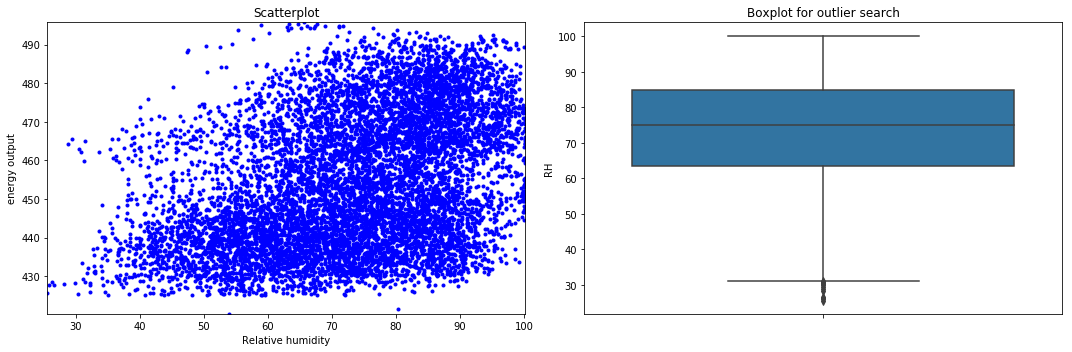

In [169]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_x4_train[:,0],dependent_y1_train[:,0])
print("slope is",slope)
print("beta0 is",intercept)
print("R-sq val is",r_value**2)
print("P value is",str.format('{0:.4f}', p_value))
print("Std error is",std_err)

slp_independent_x4 = slope
inter_independent_x4 = intercept
r2_independent_x4 = r_value**2
p_independent_x4 = p_value
stderr_independet_x4 = std_err



k = plt.figure()    
k,sbplts  = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False)


sbplts[0].scatter(independent_x4,dependent_y1, marker = ".",c="blue")
sbplts[0].set_ylabel('energy output')
sbplts[0].set_xlabel('Relative humidity')
sbplts[0].set_title('Scatterplot')
sbplts[0].set_xlim([min(independent_x4), max(independent_x4)])
sbplts[0].set_ylim([min(dependent_y1),max(dependent_y1)])

sn.boxplot(y=df_ccpp_s1['RH'],ax=sbplts[1])
sbplts[1].set_title('Boxplot for outlier search')

k.set_figheight(5)
k.set_figwidth(15)

k.tight_layout()





plt.show()

# 1. (d) Multiple regression model

Fit a multiple regression model for AT,V,AP,RH and PE . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the multi regression model .

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates .

Null hypothesis

Ho : beta(i)  = 0 ( where i belongs to {1,2,3...})

Alternate hypothesis

H1 : beta(i) ! = 0 ( where i belongs to {1,2,3...})

As P value < level of significance ( 0.05) ; all the features are significant ( beta(i) != 0 ) . Thereby for all the features we can reject the Null hypothesis.

So we reject the Null hypothesis and say AT,V,AP,RH & PE are significant .


In [170]:
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error 

multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(df_ccpp_s1[["AT","V","AP","RH"]], df_ccpp_s1["PE"], test_size=0.2, random_state=0)

model = sm.OLS(multi_y1_train, multi_x1_train).fit()
predictions = model.predict(multi_x1_test)

err_mse_mlr = mean_squared_error(multi_y1_test,predictions)

print("The test MSE for multiple regression model is : ",err_mse_mlr)

df_multi = pd.DataFrame({'Actual value': multi_y1_test, 'Predicted value': predictions})

print(df_multi.head())


model.summary()




The test MSE for multiple regression model is :  24.58641020698663
      Actual value  Predicted value
4834        431.23       431.346070
1768        460.01       462.366538
2819        461.14       465.842743
7779        445.90       448.993582
7065        451.29       460.224055


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.537e+07
Date:                Fri, 27 Sep 2019   Prob (F-statistic):                        0.00
Time:                        01:29:43   Log-Likelihood:                         -23287.
No. Observations:                7654   AIC:                                  4.658e+04
Df Residuals:                    7650   BIC:                                  4.661e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6745      0.017    -96.692      0.000      -1.708      -1.641
V             -0.2748      0.009    -30.577      0.000      -0.292      -0.257
AP             0.5029      0.000   1077.644      0.000       0.502       0.504
RH            -0.1007      0.005    -20.318      0.000      -0.110      -0.091
==============================================================================
Omnibus:                      446.477   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.007
Skew:                          -0.259   Prob(JB):                    3.61e-305
Kurtosis:                       5.032   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test MSE for multiple regression model is :  24.58641020698663
      Actual value  Predicted value
4834        431.23       431.346070
1768        460.01       462.366538
2819        461.14       465.842743
7779        445.90       448.993582
7065        451.29       460.224055


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.537e+07
Date:                Fri, 27 Sep 2019   Prob (F-statistic):                        0.00
Time:                        01:30:27   Log-Likelihood:                         -23287.
No. Observations:                7654   AIC:                                  4.658e+04
Df Residuals:                    7650   BIC:                                  4.661e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6745      0.017    -96.692      0.000      -1.708      -1.641
V             -0.2748      0.009    -30.577      0.000      -0.292      -0.257
AP             0.5029      0.000   1077.644      0.000       0.502       0.504
RH            -0.1007      0.005    -20.318      0.000      -0.110      -0.091
==============================================================================
Omnibus:                      446.477   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.007
Skew:                          -0.259   Prob(JB):                    3.61e-305
Kurtosis:                       5.032   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Multiple regression coefficient estimates vs simple linear regression coefficient estimates**

Coefficient estimate in a simple linear regression model is shown on the x-axis and its corresponding coefficient estimate in the multiple 
regression model is shown on the y-axis.

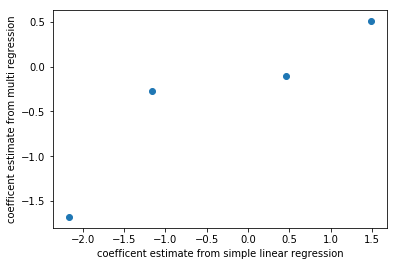

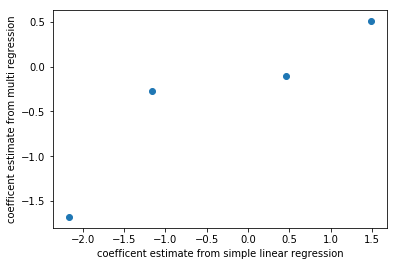

In [171]:
import matplotlib.pyplot as plt

single_lr = [slp_independent_x1,slp_independent_x2,slp_independent_x3,slp_independent_x4]
multiple_lr =[model.params[0],model.params[1],model.params[2],model.params[3]]

plt.scatter(single_lr,multiple_lr)
plt.xlabel("coefficent estimate from simple linear regression")
plt.ylabel("coefficent estimate from multi regression")
plt.show()


# 1. (f) Polynomial regression model for each predictor variable vs response variable with non linear associations of degree 3.

**Yes there is evidence of nonlinear association between the predictors and the response **

**The evidence has been demonstrated below for each predictor variable in the upcoming cells using hypothesis testing for statistical significance of coefficient estimates of non linear term **

Utilise polynomial features transformation of degree 3 from sklearn .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit a polynomial regression model for AT and PE . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the polynomial regression model between AT and PE.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates .

Null hypothesis

Ho : beta1,beta2,beta3 = 0 

Alternate hypothesis

H1 : beta1,beta2,beta3 ! = 0 

As P value < level of significance ( 0.05) for all the polynomial terms in our regression function ; AT has non linear association upto degree 3  with the response variable PE.  ( beta1,beta2,beta3 != 0 )

So we reject the Null hypothesis and say that non linear association upto degree 3 is observed between AT and PE .

In [172]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(independent_x1,dependent_y1, test_size=0.2, random_state=0)

multi_x1_train=multi_x1_train.values.reshape(-1,1)
multi_x1_test=multi_x1_test.values.reshape(-1,1)
multi_y1_train=multi_y1_train.values.reshape(-1,1)
multi_y1_test=multi_y1_test.values.reshape(-1,1)



poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(multi_x1_train)

pol_reg = sm.OLS(multi_y1_train, X_poly).fit()
predicted_values_poly_regression = pol_reg.predict(poly_reg.fit_transform(multi_x1_test))


df_poly = pd.DataFrame({'Actual value': multi_y1_test.flatten(), 'Predicted value': predicted_values_poly_regression.flatten()})

print(df_poly.head())

pol_reg.summary()



   Actual value  Predicted value
0        431.23       435.383345
1        460.01       458.086391
2        461.14       464.797380
3        445.90       446.148226
4        451.29       455.814412


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.599e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -23328.
No. Observations:                7654   AIC:                         4.666e+04
Df Residuals:                    7650   BIC:                         4.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.6155      0.758    649.529      0.000     491.129     494.102
x1            -0.5799      0.139     -4.162      0.000      -0.853      -0.307
x2            -0.1273      0.008    -16.410      0.000      -0.143      -0.112
x3             0.0027      0.000     20.338      0.000       0.002       0.003
==============================================================================
Omnibus:                      588.161   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2749.123
Skew:                          -0.222   Prob(JB):                         0.00
Kurtosis:                       5.902   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   Actual value  Predicted value
0        431.23       435.383345
1        460.01       458.086391
2        461.14       464.797380
3        445.90       446.148226
4        451.29       455.814412


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.599e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -23328.
No. Observations:                7654   AIC:                         4.666e+04
Df Residuals:                    7650   BIC:                         4.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.6155      0.758    649.529      0.000     491.129     494.102
x1            -0.5799      0.139     -4.162      0.000      -0.853      -0.307
x2            -0.1273      0.008    -16.410      0.000      -0.143      -0.112
x3             0.0027      0.000     20.338      0.000       0.002       0.003
==============================================================================
Omnibus:                      588.161   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2749.123
Skew:                          -0.222   Prob(JB):                         0.00
Kurtosis:                       5.902   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Utilise polynomial features transformation of degree 3 from sklearn .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit a polynomial regression model for V and PE . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the polynomial regression model between V and PE.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates .

Null hypothesis

Ho : beta1,beta2,beta3 = 0 

Alternate hypothesis

H1 : beta1,beta2,beta3 ! = 0 

As P value < level of significance ( 0.05) for the polynomial terms in our regression function ; V has non linear association for degrees 1 and 3 with the response variable PE.  ( beta1,beta3 != 0 ,beta2 =0 )

So we reject the Null hypothesis and say that non linear association for degrees 1 and 3 are observed between V and PE .

In [173]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(independent_x2,dependent_y1, test_size=0.2, random_state=0)

multi_x1_train=multi_x1_train.values.reshape(-1,1)
multi_x1_test=multi_x1_test.values.reshape(-1,1)
multi_y1_train=multi_y1_train.values.reshape(-1,1)
multi_y1_test=multi_y1_test.values.reshape(-1,1)



poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(multi_x1_train)

pol_reg = sm.OLS(multi_y1_train, X_poly).fit()
predicted_values_poly_regression = pol_reg.predict(poly_reg.fit_transform(multi_x1_test))


df_poly = pd.DataFrame({'Actual value': multi_y1_test.flatten(), 'Predicted value': predicted_values_poly_regression.flatten()})

print(df_poly.head())

pol_reg.summary()



   Actual value  Predicted value
0        431.23       434.350151
1        460.01       458.109619
2        461.14       467.521500
3        445.90       446.693332
4        451.29       450.269719


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     8732.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -26880.
No. Observations:                7654   AIC:                         5.377e+04
Df Residuals:                    7650   BIC:                         5.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.4075      9.967     53.919      0.000     517.870     556.945
x1            -1.2535      0.554     -2.261      0.024      -2.340      -0.167
x2            -0.0179      0.010     -1.785      0.074      -0.038       0.002
x3             0.0002   5.95e-05      3.679      0.000       0.000       0.000
==============================================================================
Omnibus:                      112.981   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.276
Skew:                          -0.124   Prob(JB):                     3.55e-41
Kurtosis:                       3.723   Cond. No.                     2.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   Actual value  Predicted value
0        431.23       434.350151
1        460.01       458.109619
2        461.14       467.521500
3        445.90       446.693332
4        451.29       450.269719


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     8732.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -26880.
No. Observations:                7654   AIC:                         5.377e+04
Df Residuals:                    7650   BIC:                         5.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.4075      9.967     53.919      0.000     517.870     556.945
x1            -1.2535      0.554     -2.261      0.024      -2.340      -0.167
x2            -0.0179      0.010     -1.785      0.074      -0.038       0.002
x3             0.0002   5.95e-05      3.679      0.000       0.000       0.000
==============================================================================
Omnibus:                      112.981   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.276
Skew:                          -0.124   Prob(JB):                     3.55e-41
Kurtosis:                       3.723   Cond. No.                     2.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Utilise polynomial features transformation of degree 3 from sklearn .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit a polynomial regression model for AP and PE . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the polynomial regression model between AP and PE.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates .

Null hypothesis

Ho : beta1,beta2,beta3 = 0 

Alternate hypothesis

H1 : beta1,beta2,beta3 ! = 0 

As P value < level of significance ( 0.05) for all the polynomial terms in our regression function ; AP has non linear association upto degree 3  with the response variable PE.  ( beta1,beta2,beta3 != 0 )

So we reject the Null hypothesis and say that non linear association upto degree 3 is observed between AP and PE .

In [174]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(independent_x3,dependent_y1, test_size=0.2, random_state=0)

multi_x1_train=multi_x1_train.values.reshape(-1,1)
multi_x1_test=multi_x1_test.values.reshape(-1,1)
multi_y1_train=multi_y1_train.values.reshape(-1,1)
multi_y1_test=multi_y1_test.values.reshape(-1,1)



poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(multi_x1_train)

pol_reg = sm.OLS(multi_y1_train, X_poly).fit()
predicted_values_poly_regression = pol_reg.predict(poly_reg.fit_transform(multi_x1_test))


df_poly = pd.DataFrame({'Actual value': multi_y1_test.flatten(), 'Predicted value': predicted_values_poly_regression.flatten()})

print(df_poly.head())

pol_reg.summary()



   Actual value  Predicted value
0        431.23       448.424829
1        460.01       467.139864
2        461.14       462.981634
3        445.90       453.386263
4        451.29       464.774665


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1456.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -31337.
No. Observations:                7654   AIC:                         6.268e+04
Df Residuals:                    7651   BIC:                         6.270e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0697      0.010      7.039      0.000       0.050       0.089
x1            23.5790      3.350      7.039      0.000      17.013      30.145
x2            -0.0466      0.007     -7.061      0.000      -0.060      -0.034
x3          2.351e-05   3.26e-06      7.217      0.000    1.71e-05    2.99e-05
==============================================================================
Omnibus:                      450.648   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.896
Skew:                           0.627   Prob(JB):                    1.28e-113
Kurtosis:                       2.755   Cond. No.                     2.11e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   Actual value  Predicted value
0        431.23       448.424829
1        460.01       467.139864
2        461.14       462.981634
3        445.90       453.386263
4        451.29       464.774665


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1456.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -31337.
No. Observations:                7654   AIC:                         6.268e+04
Df Residuals:                    7651   BIC:                         6.270e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0697      0.010      7.039      0.000       0.050       0.089
x1            23.5790      3.350      7.039      0.000      17.013      30.145
x2            -0.0466      0.007     -7.061      0.000      -0.060      -0.034
x3          2.351e-05   3.26e-06      7.217      0.000    1.71e-05    2.99e-05
==============================================================================
Omnibus:                      450.648   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.896
Skew:                           0.627   Prob(JB):                    1.28e-113
Kurtosis:                       2.755   Cond. No.                     2.11e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Utilise polynomial features transformation of degree 3 from sklearn .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit a polynomial regression model for RH and PE . Thereafter observed the predicted value vs actual value for the response variable (PE) on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the polynomial regression model between RH and PE.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates .

Null hypothesis

Ho : beta1,beta2,beta3 = 0 

Alternate hypothesis

H1 : beta1,beta2,beta3 ! = 0 

As P value < level of significance ( 0.05) for all the polynomial terms in our regression function ; RH has non linear association upto degree 3  with the response variable PE.  ( beta1,beta2,beta3 != 0 )

So we reject the Null hypothesis and say that non linear association upto degree 3 is observed between RH and PE .

In [175]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(independent_x4,dependent_y1, test_size=0.2, random_state=0)

multi_x1_train=multi_x1_train.values.reshape(-1,1)
multi_x1_test=multi_x1_test.values.reshape(-1,1)
multi_y1_train=multi_y1_train.values.reshape(-1,1)
multi_y1_test=multi_y1_test.values.reshape(-1,1)



poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(multi_x1_train)

pol_reg = sm.OLS(multi_y1_train, X_poly).fit()
predicted_values_poly_regression = pol_reg.predict(poly_reg.fit_transform(multi_x1_test))


df_poly = pd.DataFrame({'Actual value': multi_y1_test.flatten(), 'Predicted value': predicted_values_poly_regression.flatten()})

print(df_poly.head())

pol_reg.summary()



   Actual value  Predicted value
0        431.23       452.132755
1        460.01       459.835180
2        461.14       464.823552
3        445.90       451.930602
4        451.29       451.749396


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     456.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          9.69e-273
Time:                        01:29:44   Log-Likelihood:                -31941.
No. Observations:                7654   AIC:                         6.389e+04
Df Residuals:                    7650   BIC:                         6.392e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.2287     11.879     38.911      0.000     438.942     485.515
x1            -1.4287      0.548     -2.607      0.009      -2.503      -0.354
x2             0.0275      0.008      3.364      0.001       0.011       0.044
x3            -0.0001   3.96e-05     -3.272      0.001      -0.000   -5.19e-05
==============================================================================
Omnibus:                      593.152   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.311
Skew:                           0.222   Prob(JB):                     3.27e-54
Kurtosis:                       2.241   Cond. No.                     3.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   Actual value  Predicted value
0        431.23       452.132755
1        460.01       459.835180
2        461.14       464.823552
3        445.90       451.930602
4        451.29       451.749396


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     456.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          9.69e-273
Time:                        01:30:27   Log-Likelihood:                -31941.
No. Observations:                7654   AIC:                         6.389e+04
Df Residuals:                    7650   BIC:                         6.392e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.2287     11.879     38.911      0.000     438.942     485.515
x1            -1.4287      0.548     -2.607      0.009      -2.503      -0.354
x2             0.0275      0.008      3.364      0.001       0.011       0.044
x3            -0.0001   3.96e-05     -3.272      0.001      -0.000   -5.19e-05
==============================================================================
Omnibus:                      593.152   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.311
Skew:                           0.222   Prob(JB):                     3.27e-54
Kurtosis:                       2.241   Cond. No.                     3.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1. (g) Linear regression model with all pairwise interactions only

**Yes there is evidence of nonlinear association between the predictors and the response **

**The evidence has been demonstrated below for each predictor variable in the upcoming cells using hypothesis testing for statistical significance of coefficient estimates of non linear term **



Utilise polynomial features transformation from sklearn and set the interaction_only parameter as True  .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit an OLS regression model for the features AT,V,AP and RH  while simultaenously considering interactions between AT:V, AT:AP,AT:RH,V:AP,V:RH and AP:RH ( total of 6 interaction terms ) . Thereafter observed the Train MSE and test MSE for the predicted response variable (PE) values vs the actual response variable values on the test data . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the pairwise interaction terms between AT,V,AP and RH.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates of the pairwise interaction terms .

Null hypothesis

Ho : beta1,beta2,beta3,beta4,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = 0 

Alternate hypothesis

H1 : beta1,beta2,beta3,beta4,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = !0 


As P value > level of significance ( 0.05) for the interaction terms AT:AP , V:RH  and AP:RH in our regression function ; they are not significant.  ( beta1*beta3,beta2*beta4,beta3*beta4 = 0 )

So we fail to reject the Null hypothesis for the interaction terms AT:AP , V:RH  and AP:RH due to P value > level of significance (0.05) .

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt

multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(df_ccpp_s1[["AT","V","AP","RH"]], df_ccpp_s1["PE"], test_size=0.2, random_state=0)

interaction = PolynomialFeatures(interaction_only=True,include_bias = True)
interact_x_train=interaction.fit_transform(multi_x1_train)


interact_model = sm.OLS(multi_y1_train, interact_x_train).fit()
interact_test_predict = interact_model.predict(interaction.fit_transform(multi_x1_test))
interact_train_predict = interact_model.predict(interaction.fit_transform(multi_x1_train))

train_err_mse_interactions = mean_squared_error(multi_y1_train,interact_train_predict)
test_err_mse_interactions =  mean_squared_error(multi_y1_test,interact_test_predict)

print("Train MSE with all interaction terms: ",train_err_mse_interactions)
print("Test MSE with all interaction terms:",test_err_mse_interactions)


print("The order of the main effect and interaction terms : ",interaction.get_feature_names(input_features=['AT','V','AP','RH']))
interact_model.summary()



Train MSE with all interaction terms:  18.833243205174536
Test MSE with all interaction terms: 17.44602143497387
The order of the main effect and interaction terms :  ['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP', 'V RH', 'AP RH']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -22095.
No. Observations:                7654   AIC:                         4.421e+04
Df Residuals:                    7643   BIC:                         4.429e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        679.3946     89.168      7.619      0.000     504.601     854.188
x1            -3.6471      2.698     -1.352      0.176      -8.935       1.641
x2            -7.5210      1.521     -4.944      0.000     -10.503      -4.539
x3            -0.1481      0.087     -1.700      0.089      -0.319       0.023
x4             1.3993      0.881      1.589      0.112      -0.327       3.125
x5             0.0200      0.001     19.849      0.000       0.018       0.022
x6             0.0011      0.003      0.430      0.667      -0.004       0.006
x7            -0.0056      0.001     -6.121      0.000      -0.007      -0.004
x8             0.0067      0.001      4.476      0.000       0.004       0.010
x9             0.0007      0.001      1.333      0.183      -0.000       0.002
x10           -0.0014      0.001     -1.654      0.098      -0.003       0.000
==============================================================================
Omnibus:                     1324.689   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9499.451
Skew:                          -0.638   Prob(JB):                         0.00
Kurtosis:                       8.306   Cond. No.                     1.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE with all interaction terms:  18.833243205174536
Test MSE with all interaction terms: 17.44602143497387
The order of the main effect and interaction terms :  ['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP', 'V RH', 'AP RH']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -22095.
No. Observations:                7654   AIC:                         4.421e+04
Df Residuals:                    7643   BIC:                         4.429e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        679.3946     89.168      7.619      0.000     504.601     854.188
x1            -3.6471      2.698     -1.352      0.176      -8.935       1.641
x2            -7.5210      1.521     -4.944      0.000     -10.503      -4.539
x3            -0.1481      0.087     -1.700      0.089      -0.319       0.023
x4             1.3993      0.881      1.589      0.112      -0.327       3.125
x5             0.0200      0.001     19.849      0.000       0.018       0.022
x6             0.0011      0.003      0.430      0.667      -0.004       0.006
x7            -0.0056      0.001     -6.121      0.000      -0.007      -0.004
x8             0.0067      0.001      4.476      0.000       0.004       0.010
x9             0.0007      0.001      1.333      0.183      -0.000       0.002
x10           -0.0014      0.001     -1.654      0.098      -0.003       0.000
==============================================================================
Omnibus:                     1324.689   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9499.451
Skew:                          -0.638   Prob(JB):                         0.00
Kurtosis:                       8.306   Cond. No.                     1.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1. (h) Modelling non linearities as well as interaction terms in our regression model followed by the elimination of insignificant terms 

Utilise polynomial features transformation from sklearn and set the degree as two and interaction_only parameter as False to obtain a transformation that contains all quadratic non linearities and pairwise interaction terms  .Save the polynomial features transformation in a seperate variable .Apply the polynomial features transformation on the train_x and test_x splits . Fit an OLS regression model for the features AT,V,AP and RH  while simultaenously considering non linearities interactions between AT * AT , V * V ,AP * AP,RH * RH, AT:V, AT:AP,AT:RH,V:AP,V:RH and AP:RH ( total of 6 interaction terms , 4 quadratic non linearities and 4 main effects ) . Thereafter observed the term with highest P value greater than 0.05 and removed that interaction term (V:RH) . Utilised OLS ( ordinary least squares) regression function from the statsmodel.api library in order to model the non linearities and pairwise interaction terms between AT,V,AP and RH.

Printed the model summarisation in order to observe the statistical significance of the coefficient estimates of the non linearities and pairwise interaction terms .

Null hypothesis

Ho : beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = 0 

Alternate hypothesis

H1 :beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3 * beta4  != 0 


Highest P value greater than 0.5 observed for (V:RH) interaction term . Therefore removed it firstly from our regression model . 



In [177]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

multi_x1_train, multi_x1_test, multi_y1_train, multi_y1_test = train_test_split(df_ccpp_s1[["AT","V","AP","RH"]], df_ccpp_s1["PE"], test_size=0.3, random_state=0)

interaction = PolynomialFeatures(degree=2,interaction_only=False,include_bias = True)
interact_x_train=interaction.fit_transform(multi_x1_train)


interact_model = sm.OLS(multi_y1_train, interact_x_train).fit()
interact_test_predict = interact_model.predict(interaction.fit_transform(multi_x1_test))
interact_train_predict = interact_model.predict(interaction.fit_transform(multi_x1_train))

train_err_mse_interactions = mean_squared_error(multi_y1_train,interact_train_predict)
test_err_mse_interactions =  mean_squared_error(multi_y1_test,interact_test_predict)

print("Train MSE with all non linearities and  interaction terms before removing insignificant terms: ",train_err_mse_interactions)
print("Test MSE with all  non linearities and  interaction terms before removing insignificant terms: ",test_err_mse_interactions)




print("The order of the non linearities and interaction terms are ",interaction.get_feature_names(input_features=['AT','V','AP','RH']))

interact_model.summary()


Train MSE with all non linearities and  interaction terms before removing insignificant terms:  18.366012211970848
Test MSE with all  non linearities and  interaction terms before removing insignificant terms:  17.520160997600847
The order of the non linearities and interaction terms are  ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
x1            -6.3067      3.826     -1.648      0.099     -13.807       1.194
x2            -2.7832      1.818     -1.531      0.126      -6.347       0.780
x3            14.8033      2.916      5.076      0.000       9.086      20.521
x4             3.3825      1.086      3.114      0.002       1.253       5.512
x5             0.0168      0.004      4.482      0.000       0.009       0.024
x6             0.0103      0.003      3.174      0.002       0.004       0.017
x7             0.0037      0.004      0.997      0.319      -0.004       0.011
x8            -0.0061      0.002     -3.305      0.001      -0.010      -0.002
x9            -0.0005      0.001     -0.551      0.581      -0.002       0.001
x10            0.0023      0.002      1.290      0.197      -0.001       0.006
x11            0.0003      0.001      0.340      0.734      -0.001       0.002
x12           -0.0072      0.001     -5.108      0.000      -0.010      -0.004
x13           -0.0031      0.001     -2.934      0.003      -0.005      -0.001
x14           -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE with all non linearities and  interaction terms before removing insignificant terms:  18.366012211970848
Test MSE with all  non linearities and  interaction terms before removing insignificant terms:  17.520160997600847
The order of the non linearities and interaction terms are  ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
x1            -6.3067      3.826     -1.648      0.099     -13.807       1.194
x2            -2.7832      1.818     -1.531      0.126      -6.347       0.780
x3            14.8033      2.916      5.076      0.000       9.086      20.521
x4             3.3825      1.086      3.114      0.002       1.253       5.512
x5             0.0168      0.004      4.482      0.000       0.009       0.024
x6             0.0103      0.003      3.174      0.002       0.004       0.017
x7             0.0037      0.004      0.997      0.319      -0.004       0.011
x8            -0.0061      0.002     -3.305      0.001      -0.010      -0.002
x9            -0.0005      0.001     -0.551      0.581      -0.002       0.001
x10            0.0023      0.002      1.290      0.197      -0.001       0.006
x11            0.0003      0.001      0.340      0.734      -0.001       0.002
x12           -0.0072      0.001     -5.108      0.000      -0.010      -0.004
x13           -0.0031      0.001     -2.934      0.003      -0.005      -0.001
x14           -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Deleted the 11th entry (V:RH interaction term ) from the transformed train_x and test_x and fit the model again with OLS regression.
Printed the model summarisation in order to observe the statistical significance of the coefficient estimates of the remaining non linearities and pairwise interaction terms .

Null hypothesis

Ho : beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = 0 

Alternate hypothesis

H1 :beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3 * beta4  != 0 


Highest P value greater than 0.5 observed for (V * V) non linearity . Therefore removed it next from our regression model . 

In [178]:
interact_x_test=interaction.fit_transform(multi_x1_test)

interact_x_train= np.delete(interact_x_train,11,axis=1)
interact_x_test = np.delete(interact_x_test,11,axis=1)

interact_model = sm.OLS(multi_y1_train, sm.add_constant(interact_x_train)).fit()
interact_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7621.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6683   BIC:                         3.862e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7038.8322   1502.025     -4.686      0.000   -9983.281   -4094.384
x1            -6.6428      3.696     -1.797      0.072     -13.887       0.602
x2            -2.5932      1.729     -1.500      0.134      -5.983       0.797
x3            14.7374      2.910      5.065      0.000       9.033      20.442
x4             3.3058      1.062      3.112      0.002       1.223       5.388
x5             0.0176      0.003      6.059      0.000       0.012       0.023
x6             0.0096      0.002      3.866      0.000       0.005       0.014
x7             0.0040      0.004      1.110      0.267      -0.003       0.011
x8            -0.0056      0.001     -5.528      0.000      -0.008      -0.004
x9            -0.0004      0.001     -0.449      0.653      -0.002       0.001
x10            0.0021      0.002      1.245      0.213      -0.001       0.005
x11           -0.0072      0.001     -5.097      0.000      -0.010      -0.004
x12           -0.0030      0.001     -2.927      0.003      -0.005      -0.001
x13           -0.0019      0.000     -6.500      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1414.927   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12101.785
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.403   Cond. No.                     2.95e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7621.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:27   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6683   BIC:                         3.862e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7038.8322   1502.025     -4.686      0.000   -9983.281   -4094.384
x1            -6.6428      3.696     -1.797      0.072     -13.887       0.602
x2            -2.5932      1.729     -1.500      0.134      -5.983       0.797
x3            14.7374      2.910      5.065      0.000       9.033      20.442
x4             3.3058      1.062      3.112      0.002       1.223       5.388
x5             0.0176      0.003      6.059      0.000       0.012       0.023
x6             0.0096      0.002      3.866      0.000       0.005       0.014
x7             0.0040      0.004      1.110      0.267      -0.003       0.011
x8            -0.0056      0.001     -5.528      0.000      -0.008      -0.004
x9            -0.0004      0.001     -0.449      0.653      -0.002       0.001
x10            0.0021      0.002      1.245      0.213      -0.001       0.005
x11           -0.0072      0.001     -5.097      0.000      -0.010      -0.004
x12           -0.0030      0.001     -2.927      0.003      -0.005      -0.001
x13           -0.0019      0.000     -6.500      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1414.927   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12101.785
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.403   Cond. No.                     2.95e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Deleted the 9th entry (V * V non linearity term ) from the transformed train_x and test_x and fit the model again with OLS regression.
Printed the model summarisation in order to observe the statistical significance of the coefficient estimates of the remaining non linearities and pairwise interaction terms .

Null hypothesis

Ho : beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = 0 

Alternate hypothesis

H1 :beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3 * beta4  != 0 


Highest P value greater than 0.5 observed for (AT : AP) interaction term . Therefore removed it next from our regression model . 

In [179]:
interact_x_train= np.delete(interact_x_train,9,axis=1)
interact_x_test = np.delete(interact_x_test,9,axis=1)

interact_model = sm.OLS(multi_y1_train, sm.add_constant(interact_x_train)).fit()
interact_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8257.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6684   BIC:                         3.861e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7052.6659   1501.620     -4.697      0.000   -9996.319   -4109.013
x1            -6.7236      3.691     -1.822      0.069     -13.959       0.512
x2            -2.5607      1.728     -1.482      0.138      -5.948       0.826
x3            14.7620      2.909      5.074      0.000       9.059      20.465
x4             3.3261      1.061      3.134      0.002       1.246       5.406
x5             0.0182      0.003      6.989      0.000       0.013       0.023
x6             0.0087      0.002      5.428      0.000       0.006       0.012
x7             0.0041      0.004      1.142      0.253      -0.003       0.011
x8            -0.0056      0.001     -5.610      0.000      -0.008      -0.004
x9             0.0021      0.002      1.214      0.225      -0.001       0.005
x10           -0.0072      0.001     -5.105      0.000      -0.010      -0.004
x11           -0.0030      0.001     -2.946      0.003      -0.005      -0.001
x12           -0.0019      0.000     -6.553      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1415.271   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12096.745
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.401   Cond. No.                     2.95e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8257.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:28   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6684   BIC:                         3.861e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7052.6659   1501.620     -4.697      0.000   -9996.319   -4109.013
x1            -6.7236      3.691     -1.822      0.069     -13.959       0.512
x2            -2.5607      1.728     -1.482      0.138      -5.948       0.826
x3            14.7620      2.909      5.074      0.000       9.059      20.465
x4             3.3261      1.061      3.134      0.002       1.246       5.406
x5             0.0182      0.003      6.989      0.000       0.013       0.023
x6             0.0087      0.002      5.428      0.000       0.006       0.012
x7             0.0041      0.004      1.142      0.253      -0.003       0.011
x8            -0.0056      0.001     -5.610      0.000      -0.008      -0.004
x9             0.0021      0.002      1.214      0.225      -0.001       0.005
x10           -0.0072      0.001     -5.105      0.000      -0.010      -0.004
x11           -0.0030      0.001     -2.946      0.003      -0.005      -0.001
x12           -0.0019      0.000     -6.553      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1415.271   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12096.745
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.401   Cond. No.                     2.95e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Deleted the 7th entry (AT:AP interaction term ) from the transformed train_x and test_x and fit the model again with OLS regression.
Printed the model summarisation in order to observe the statistical significance of the coefficient estimates of the remaining non linearities and pairwise interaction terms .

Null hypothesis

Ho : beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3* beta4 = 0 

Alternate hypothesis

H1 :beta1,beta2,beta3,beta4,beta1 * beta1 , beta2 * beta2 ,beta3 * beta3 ,beta4 * beta4 ,beta1 * beta2 ,beta1 * beta3.....beta3 * beta4  != 0 


All the P values for main effects , non linearities and interaction terms  at this point are < 0.05 ( level of significance). So we reject the Null hypothesis and compute our train and test MSE with this final version wherein all insignificant non linearities and interaction terms have been removed . 

In [180]:
interact_x_train= np.delete(interact_x_train,7,axis=1)
interact_x_test = np.delete(interact_x_test,7,axis=1)

interact_model = sm.OLS(multi_y1_train, sm.add_constant(interact_x_train)).fit()
interact_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9007.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6685   BIC:                         3.860e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7928.9687   1290.972     -6.142      0.000   -1.05e+04   -5398.252
x1            -2.5087      0.114    -21.925      0.000      -2.733      -2.284
x2            -4.0690      1.114     -3.651      0.000      -6.254      -1.884
x3            16.4406      2.511      6.548      0.000      11.519      21.363
x4             4.0479      0.853      4.747      0.000       2.376       5.719
x5             0.0168      0.002      7.327      0.000       0.012       0.021
x6             0.0093      0.002      6.043      0.000       0.006       0.012
x7            -0.0060      0.001     -6.346      0.000      -0.008      -0.004
x8             0.0035      0.001      3.242      0.001       0.001       0.006
x9            -0.0080      0.001     -6.548      0.000      -0.010      -0.006
x10           -0.0037      0.001     -4.530      0.000      -0.005      -0.002
x11           -0.0019      0.000     -6.688      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1413.605   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12050.020
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.388   Cond. No.                     2.54e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9007.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:30:28   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6685   BIC:                         3.860e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7928.9687   1290.972     -6.142      0.000   -1.05e+04   -5398.252
x1            -2.5087      0.114    -21.925      0.000      -2.733      -2.284
x2            -4.0690      1.114     -3.651      0.000      -6.254      -1.884
x3            16.4406      2.511      6.548      0.000      11.519      21.363
x4             4.0479      0.853      4.747      0.000       2.376       5.719
x5             0.0168      0.002      7.327      0.000       0.012       0.021
x6             0.0093      0.002      6.043      0.000       0.006       0.012
x7            -0.0060      0.001     -6.346      0.000      -0.008      -0.004
x8             0.0035      0.001      3.242      0.001       0.001       0.006
x9            -0.0080      0.001     -6.548      0.000      -0.010      -0.006
x10           -0.0037      0.001     -4.530      0.000      -0.005      -0.002
x11           -0.0019      0.000     -6.688      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1413.605   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12050.020
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.388   Cond. No.                     2.54e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The train MSE obtained after removing insignificant non-linearities and interaction terms is 18.370470029706755 and the test MSE obtained after removing insignificant non-linearities and interaction terms is 17.53269894993465 which is nearly the same as the train MSE and test MSE before removing insignificant non-linearities and interaction terms.
**



In [181]:
interact_test_predict = interact_model.predict(interact_x_test)
interact_train_predict = interact_model.predict(interact_x_train)

train_err_mse_interactions = mean_squared_error(multi_y1_train,interact_train_predict)
test_err_mse_interactions =  mean_squared_error(multi_y1_test,interact_test_predict)

print("Train MSE with all interaction terms: ",train_err_mse_interactions)
print("Test MSE with all interaction terms:",test_err_mse_interactions)

Train MSE with all interaction terms:  18.370470029706755
Test MSE with all interaction terms: 17.53269894993465
Train MSE with all interaction terms:  18.370470029706755
Test MSE with all interaction terms: 17.53269894993465


# 1. (i) KNN regression with normalized features

Normalized the predictors/features in the dataset and thereafter performed the train-test split .  Ran a loop with different values of K ranging from 1 to 100 and then built a KNN regression model with the normalized training data. Computed the train and test MSE for the KNN regression model with different values of K .

In [0]:

from sklearn import preprocessing
import pandas as pd

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

X = df_ccpp_s1[["AT","V","AP","RH"]]
Y =  df_ccpp_s1["PE"]

normalized_X = preprocessing.normalize(X)

knnr_x1_train, knnr_x1_test, knnr_y1_train, knnr_y1_test = train_test_split(normalized_X,Y, test_size=0.2, random_state=0)

knnr_x1_train=pd.DataFrame(knnr_x1_train,columns=["AT","V","AP","RH"])
knnr_x1_test=pd.DataFrame(knnr_x1_test,columns=["AT","V","AP","RH"])
knnr_y1_train=pd.DataFrame(knnr_y1_train,columns=["PE"])
knnr_y1_test=pd.DataFrame(knnr_y1_test,columns=["PE"])


k_vals = list(range(1,101))
k_inv_vals=[np.reciprocal(float(i)) for i in k_vals]
mse_normalized_test = [] 
mse_normalized_train=[]
for k in range(100):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(knnr_x1_train, knnr_y1_train) 
    knnr_test_pred=model.predict(knnr_x1_test)
    knnr_train_pred=model.predict(knnr_x1_train)
    err_train_mse = mean_squared_error(knnr_y1_train,knnr_train_pred)
    err_test_mse = mean_squared_error(knnr_y1_test,knnr_test_pred) 
    mse_normalized_train.append(err_train_mse)
    mse_normalized_test.append(err_test_mse)
    
    
    
    



Printed the train MSE for the KNN regression model with normalized features .Plotted the train MSE for each iteration of K vs 1/K . When 1/K is less (i.e. K is high) ; the train MSE is high  and then it continuously drops as 1/K increases ( i.e. K decreases ) and the train MSE becomes 0 when 1/k reaches 1 ( i.e. K reaches 1 too) . This is because at K=1 ,the nearest neighbor to a training data point is itself .

[0.0, 7.103828204206951, 9.736800213396043, 11.058915509864125, 12.117345351972824, 12.826526907862263, 13.394181082053928, 13.863707627139407, 14.223889640694615, 14.545553322184485, 14.767541167692805, 15.000417667505015, 15.201720231908757, 15.417540073151036, 15.575600465348558, 15.788964111391918, 15.96970184981415, 16.100662591294157, 16.238395879727584, 16.3608954388555, 16.46934603177566, 16.60709329910683, 16.71460845559088, 16.833420692838526, 16.92839780837209, 17.018556496003942, 17.117880745536638, 17.192895105650372, 17.285318228638307, 17.36343022692564, 17.417725644980464, 17.474921244916874, 17.557423107971175, 17.619640720131407, 17.69296385290338, 17.762406747762814, 17.82548576423371, 17.853064587243512, 17.913243038605767, 17.972693888334526, 18.01908241192895, 18.083134909599227, 18.123944842309825, 18.188083404574815, 18.270813575304764, 18.301457730411908, 18.355852194830202, 18.39735832439647, 18.46004580335017, 18.502136036639673, 18.55650390191829, 18.6038104

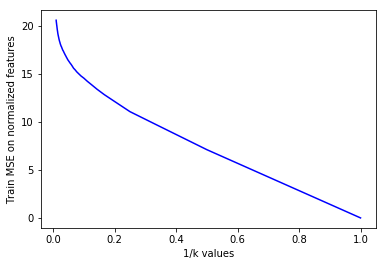

[0.0, 7.103828204206951, 9.736800213396043, 11.058915509864125, 12.117345351972824, 12.826526907862263, 13.394181082053928, 13.863707627139407, 14.223889640694615, 14.545553322184485, 14.767541167692805, 15.000417667505015, 15.201720231908757, 15.417540073151036, 15.575600465348558, 15.788964111391918, 15.96970184981415, 16.100662591294157, 16.238395879727584, 16.3608954388555, 16.46934603177566, 16.60709329910683, 16.71460845559088, 16.833420692838526, 16.92839780837209, 17.018556496003942, 17.117880745536638, 17.192895105650372, 17.285318228638307, 17.36343022692564, 17.417725644980464, 17.474921244916874, 17.557423107971175, 17.619640720131407, 17.69296385290338, 17.762406747762814, 17.82548576423371, 17.853064587243512, 17.913243038605767, 17.972693888334526, 18.01908241192895, 18.083134909599227, 18.123944842309825, 18.188083404574815, 18.270813575304764, 18.301457730411908, 18.355852194830202, 18.39735832439647, 18.46004580335017, 18.502136036639673, 18.55650390191829, 18.6038104

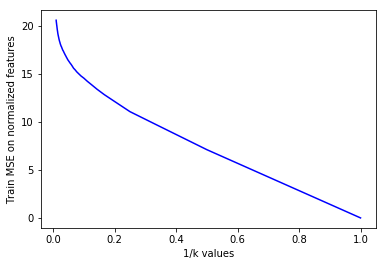

In [183]:
print(mse_normalized_train)
plt.plot(k_inv_vals,mse_normalized_train,c="blue")
plt.xlabel("1/k values")
plt.ylabel("Train MSE on normalized features")
plt.show()    

Printed the test MSE for the KNN regression model with normalized features .Plotted the test MSE for each iteration of K vs 1/K . When 1/K is less (i.e. K is high) ; the test MSE is high due to a high bias and then it continuously drops as 1/K increases ( i.e. K decreases ) until it reaches a minima wherein the tradeoff between the bias and variance is balanced and then test MSE increases again when 1/k reaches 1 ( i.e. K reaches 1 too) due to high variance leading to overfitting . 

[26.330372361546498, 20.66659088296761, 18.47270539301057, 17.634842388322884, 16.99789652664578, 17.12398321868106, 16.970495849060622, 16.730803958496605, 16.716997246410465, 16.800680163009403, 16.821111102187444, 16.848951126204568, 16.828164473545897, 16.810500035453053, 16.87751483849995, 16.89580737942464, 16.9444680565348, 16.952374065205056, 16.960464194287898, 17.05822968808778, 17.099423001893214, 17.1329760158942, 17.154325160048433, 17.148237882597524, 17.15157452179728, 17.194830679113092, 17.29878080564406, 17.321893914270248, 17.421260176967497, 17.482745517299417, 17.49412067454116, 17.52317704200545, 17.5783798411588, 17.618379373754845, 17.6847756172563, 17.674162578168332, 17.75831963377, 17.820078434273487, 17.840751005051533, 17.887921845480665, 17.921789737784838, 17.98737640076581, 18.05504519692929, 18.0988878725539, 18.15230529937949, 18.214992160466217, 18.242247254321526, 18.275958593931417, 18.278917519041407, 18.318256453939416, 18.39738712224663, 18.43450

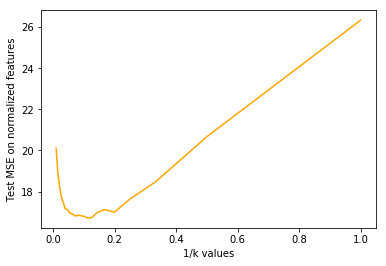

[26.330372361546498, 20.66659088296761, 18.47270539301057, 17.634842388322884, 16.99789652664578, 17.12398321868106, 16.970495849060622, 16.730803958496605, 16.716997246410465, 16.800680163009403, 16.821111102187444, 16.848951126204568, 16.828164473545897, 16.810500035453053, 16.87751483849995, 16.89580737942464, 16.9444680565348, 16.952374065205056, 16.960464194287898, 17.05822968808778, 17.099423001893214, 17.1329760158942, 17.154325160048433, 17.148237882597524, 17.15157452179728, 17.194830679113092, 17.29878080564406, 17.321893914270248, 17.421260176967497, 17.482745517299417, 17.49412067454116, 17.52317704200545, 17.5783798411588, 17.618379373754845, 17.6847756172563, 17.674162578168332, 17.75831963377, 17.820078434273487, 17.840751005051533, 17.887921845480665, 17.921789737784838, 17.98737640076581, 18.05504519692929, 18.0988878725539, 18.15230529937949, 18.214992160466217, 18.242247254321526, 18.275958593931417, 18.278917519041407, 18.318256453939416, 18.39738712224663, 18.43450

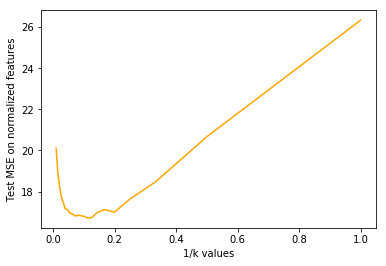

In [184]:
print(mse_normalized_test)
print(min(mse_normalized_test))
plt.plot(k_inv_vals,mse_normalized_test,c="orange")
plt.xlabel("1/k values")
plt.ylabel("Test MSE on normalized features")
plt.show()

Chose the value of K with lowest test MSE ( K=9 ) and then performed predictions using the KNN regression model at K=9 and printed the train MSE as well as test MSE for the KNN regression model at K=9 .

The test MSE of this KNN regression model with normalized features is compared against the test MSE of the linear regression model that has the smallest error rate which in my case was the linear regresson model with just the pairwise interaction terms ( test MSE was 17.44 in that model ).

So we observe that the KNN regressor clearly outperforms the linear regression model ( with a test MSE of 16.71 ) by providing a better estimate of the regression function in a given neighborhood of data points and in this case serving as a better way to estimate the regression function when compared to assuming linearity and estimating the coefficients of the linear model .

The reason KNN is outperforming linear regression could be because the relationship between our features and the response isnt best modelled by a linear model .  It is completely dependent on how our features are , if they can be modelled well by a linear model etc. The extent to which it can be well modelled by linear regression or any other regression algorithm for that depends on our data.  No free lunch is the answer  .








In [185]:
    model = neighbors.KNeighborsRegressor(n_neighbors = 9)
    model.fit(knnr_x1_train, knnr_y1_train) 
    knnr_test_pred=model.predict(knnr_x1_test)
    knnr_train_pred=model.predict(knnr_x1_train)
    err_train_mse = mean_squared_error(knnr_y1_train,knnr_train_pred)
    err_test_mse = mean_squared_error(knnr_y1_test,knnr_test_pred)
    
    print("Train MSE for KNN regressor at K=9 : ",err_train_mse)
    print("Test MSE for KNN regressor at k=9 : ",err_test_mse)

Train MSE for KNN regressor at K=9 :  14.223889640694615
Test MSE for KNN regressor at k=9 :  16.716997246410465
Train MSE for KNN regressor at K=9 :  14.223889640694615
Test MSE for KNN regressor at k=9 :  16.716997246410465


# 1. (i) KNN regression with non normalized features :

Performed the train-test split . Ran a loop with different values of K ranging from 1 to 100 and then built a KNN regression model with the training data. Computed the train and test MSE for the KNN regression model with different values of K .

In [0]:
from sklearn import preprocessing
import pandas as pd

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

X = df_ccpp_s1[["AT","V","AP","RH"]]
Y =  df_ccpp_s1["PE"]

knnr_x1_train, knnr_x1_test, knnr_y1_train, knnr_y1_test = train_test_split(X,Y, test_size=0.2, random_state=0)


k_vals = list(range(1,101))
k_inv_vals=[np.reciprocal(float(i)) for i in k_vals]
mse_test = [] 
mse_train=[]
for k in range(100):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(knnr_x1_train, knnr_y1_train) 
    knnr_test_pred=model.predict(knnr_x1_test)
    knnr_train_pred=model.predict(knnr_x1_train)
    err_train_mse = mean_squared_error(knnr_y1_train,knnr_train_pred)
    err_test_mse = mean_squared_error(knnr_y1_test,knnr_test_pred) 
    mse_train.append(err_train_mse)
    mse_test.append(err_test_mse) 
    

Printed the train MSE for the KNN regression model with normalized features .Plotted the train MSE for each iteration of K vs 1/K . When 1/K is less (i.e. K is high) ; the train MSE is high  and then it continuously drops as 1/K increases ( i.e. K decreases ) and the train MSE becomes 0 when 1/k reaches 1 ( i.e. K reaches 1 too) . This is because at K=1 ,the nearest neighbor to a training data point is itself .

[0.0, 5.307717484321922, 7.725298919954709, 9.407383961000786, 10.38075792265482, 11.191180770040356, 11.78951887981741, 12.360227310883195, 12.885927649546591, 13.362435952573811, 13.772783975213082, 14.071180501843621, 14.376920118033954, 14.613436064109464, 14.89964774636355, 15.125677864872534, 15.323711176687587, 15.502295348151694, 15.665447907237317, 15.856132679285334, 16.02708015265681, 16.163323574774267, 16.261041544878363, 16.406976520242683, 16.58254915348837, 16.743712250894063, 16.83728337867573, 16.90169893276424, 17.014053365240457, 17.137059545872884, 17.224884682266065, 17.343365225507593, 17.434403081843442, 17.523742221415755, 17.614764707422545, 17.707003118437218, 17.79833037091039, 17.871735664168497, 17.94384843011359, 18.021126572192642, 18.078744625175666, 18.20026706238108, 18.275648668105394, 18.373156584097167, 18.46497707497411, 18.542849907519596, 18.60617292997398, 18.674664179331387, 18.74164654815676, 18.82199809562581, 18.883186889692976, 18.95627257

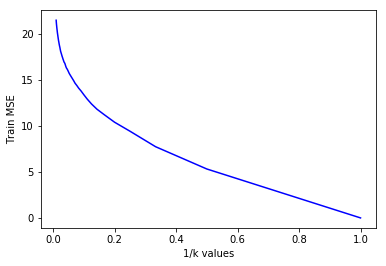

[0.0, 5.307717484321922, 7.725298919954709, 9.407383961000786, 10.38075792265482, 11.191180770040356, 11.78951887981741, 12.360227310883195, 12.885927649546591, 13.362435952573811, 13.772783975213082, 14.071180501843621, 14.376920118033954, 14.613436064109464, 14.89964774636355, 15.125677864872534, 15.323711176687587, 15.502295348151694, 15.665447907237317, 15.856132679285334, 16.02708015265681, 16.163323574774267, 16.261041544878363, 16.406976520242683, 16.58254915348837, 16.743712250894063, 16.83728337867573, 16.90169893276424, 17.014053365240457, 17.137059545872884, 17.224884682266065, 17.343365225507593, 17.434403081843442, 17.523742221415755, 17.614764707422545, 17.707003118437218, 17.79833037091039, 17.871735664168497, 17.94384843011359, 18.021126572192642, 18.078744625175666, 18.20026706238108, 18.275648668105394, 18.373156584097167, 18.46497707497411, 18.542849907519596, 18.60617292997398, 18.674664179331387, 18.74164654815676, 18.82199809562581, 18.883186889692976, 18.95627257

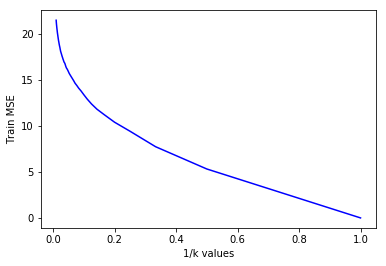

In [187]:

print(mse_train)
plt.plot(k_inv_vals,mse_train,c="blue")
plt.xlabel("1/k values")
plt.ylabel("Train MSE")
plt.show()    



Printed the test MSE for the KNN regression model with normalized features .Plotted the test MSE for each iteration of K vs 1/K . When 1/K is less (i.e. K is high) ; the test MSE is high due to a high bias and then it continuously drops as 1/K increases ( i.e. K decreases ) until it reaches a minima wherein the tradeoff between the bias and variance is balanced and then test MSE increases again when 1/k reaches 1 ( i.e. K reaches 1 too) due to high variance leading to overfitting .

[22.329672779519342, 16.807151946186, 15.289023098804138, 14.800865063349015, 14.808145966562186, 14.598143010565432, 14.858674603885454, 15.011923461174243, 15.007436849981293, 15.094532654649953, 15.397205130530155, 15.529589659526298, 15.627944121175025, 15.618531199486066, 15.650315116451877, 15.795381797772988, 15.909197698076095, 16.0553289363946, 16.24995116809513, 16.399204687565312, 16.526578791788396, 16.624590011723107, 16.78314850213234, 16.918023702451958, 16.956442411285273, 17.072426601945804, 17.178648452310817, 17.289114710751065, 17.359145908177666, 17.425201818472075, 17.508123226469728, 17.5867417109028, 17.67384345382196, 17.783065073190432, 17.92478524069689, 17.990258428675318, 18.065252895507545, 18.101431837249653, 18.168830216880075, 18.234329630257314, 18.262626207157627, 18.357317961932246, 18.392816157339986, 18.454463341208108, 18.519072640788483, 18.52412176014267, 18.5832458967613, 18.61082092392585, 18.668314099380396, 18.746713785977015, 18.79367398020

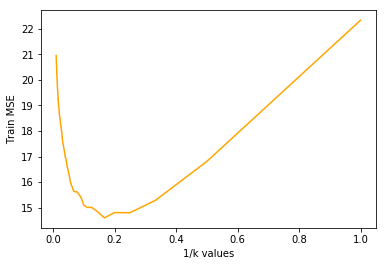

[22.329672779519342, 16.807151946186, 15.289023098804138, 14.800865063349015, 14.808145966562186, 14.598143010565432, 14.858674603885454, 15.011923461174243, 15.007436849981293, 15.094532654649953, 15.397205130530155, 15.529589659526298, 15.627944121175025, 15.618531199486066, 15.650315116451877, 15.795381797772988, 15.909197698076095, 16.0553289363946, 16.24995116809513, 16.399204687565312, 16.526578791788396, 16.624590011723107, 16.78314850213234, 16.918023702451958, 16.956442411285273, 17.072426601945804, 17.178648452310817, 17.289114710751065, 17.359145908177666, 17.425201818472075, 17.508123226469728, 17.5867417109028, 17.67384345382196, 17.783065073190432, 17.92478524069689, 17.990258428675318, 18.065252895507545, 18.101431837249653, 18.168830216880075, 18.234329630257314, 18.262626207157627, 18.357317961932246, 18.392816157339986, 18.454463341208108, 18.519072640788483, 18.52412176014267, 18.5832458967613, 18.61082092392585, 18.668314099380396, 18.746713785977015, 18.79367398020

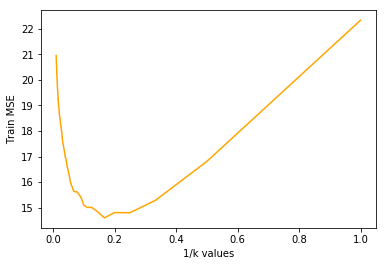

In [188]:
print(mse_test)
print(min(mse_test))
plt.plot(k_inv_vals,mse_test,c="orange")
plt.xlabel("1/k values")
plt.ylabel("Train MSE")
plt.show()    

Chose the value of K with lowest test MSE ( K=6 ) and then performed predictions using the KNN regression model at K=6 and printed the train MSE as well as test MSE for the KNN regression model at K=6 .

The test MSE of this KNN regression model with normalized features is compared against the test MSE of the linear regression model that has the smallest error rate which in my case was the linear regresson model with just the pairwise interaction terms ( test MSE was 17.44 in that model ).

So we observe that the KNN regressor clearly outperforms the linear regression model ( with a test MSE of 14.598) by providing a better estimate of the regression function in a given neighborhood of data points and in this case serving as a better way to estimate the regression function when compared to assuming linearity and estimating the coefficients of the linear model .

The reason KNN is outperforming linear regression could be because the relationship between our features and the response isnt best modelled by a linear model . It is completely dependent on how our features are , if they can be modelled well by a linear model etc. The extent to which it can be well modelled by linear regression or any other regression algorithm for that depends on our data. No free lunch is the answer .

In [189]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(knnr_x1_train, knnr_y1_train) 
knnr_test_pred=model.predict(knnr_x1_test)
knnr_train_pred=model.predict(knnr_x1_train)
err_train_mse = mean_squared_error(knnr_y1_train,knnr_train_pred)
err_test_mse = mean_squared_error(knnr_y1_test,knnr_test_pred)
    
print("Train MSE for KNN regressor at K=6 : ",err_train_mse)
print("Test MSE for KNN regressor at k=6 : ",err_test_mse)

Train MSE for KNN regressor at K=6 :  11.191180770040356
Test MSE for KNN regressor at k=6 :  14.598143010565432
Train MSE for KNN regressor at K=6 :  11.191180770040356
Test MSE for KNN regressor at k=6 :  14.598143010565432


# 1. (j) Comparison of KNN (both with and without normalized features) with linear regression model with lowest test MSE  

**Comparison against KNN with normalized features :**

Chose the value of K with lowest test MSE ( K=9 ) and then performed predictions using the KNN regression model at K=9 and printed the train MSE as well as test MSE for the KNN regression model at K=9 .

The test MSE of this KNN regression model with normalized features is compared against the test MSE of the linear regression model that has the smallest error rate which in my case was the linear regresson model with just the pairwise interaction terms ( test MSE was 17.44 in that model ).

So we observe that the KNN regressor clearly outperforms the linear regression model ( with a test MSE of 16.71 ) by providing a better estimate of the regression function in a given neighborhood of data points and in this case serving as a better way to estimate the regression function when compared to assuming linearity and estimating the coefficients of the linear model .

The reason KNN is outperforming linear regression could be because the relationship between our features and the response isnt best modelled by a linear model .  It is completely dependent on how our features are , if they can be modelled well by a linear model etc. The extent to which it can be well modelled by linear regression or any other regression algorithm for that depends on our data.  No free lunch is the answer  .

**Comparison against KNN with non normalized features :**

Chose the value of K with lowest test MSE ( K=6 ) and then performed predictions using the KNN regression model at K=6 and printed the train MSE as well as test MSE for the KNN regression model at K=6 .

The test MSE of this KNN regression model with normalized features is compared against the test MSE of the linear regression model that has the smallest error rate which in my case was the linear regresson model with just the pairwise interaction terms ( test MSE was 17.44 in that model ).

So we observe that the KNN regressor clearly outperforms the linear regression model ( with a test MSE of 14.598) by providing a better estimate of the regression function in a given neighborhood of data points and in this case serving as a better way to estimate the regression function when compared to assuming linearity and estimating the coefficients of the linear model .

The reason KNN is outperforming linear regression could be because the relationship between our features and the response isnt best modelled by a linear model . It is completely dependent on how our features are , if they can be modelled well by a linear model etc. The extent to which it can be well modelled by linear regression or any other regression algorithm for that depends on our data. No free lunch is the answer .





# 2) ISLR 2.4.1. &  3) ISLR 2.4.7 scanned PDF has been enclosed in the google drive link below . I have also attached the PDF file in the zip folder that has been submitted on blackboard.

[ISLR H.W](https://drive.google.com/file/d/116yH-vIAgQ2ozuWERqPnq9fz_1jqmboB/view?usp=sharing)